Internet advertising specialist launched three advertising campaigns on GeoCasino
In the first campaign, he used the wheel of fortune creative, in the second - the Crazy Monkey slot and 30 FS, and in the third - a $10 no deposit bonus in the Book of Ra game.
     
The average CTR in the first campaign was 1.53%; in the second campaign 1.18%, in the third 1.98%
     
All three campaigns were launched as a test and they all worked 7 days in a row, from Monday to Sunday.
     
From Monday to Wednesday, the average CPM on the auction was $4.50. After that, it daily rose in price by an average of 12.5%.
     
The specialist had a total test budget from the manager in the amount of $10,000.
     
On the first day, he tried to use only 15% of the total budget and distributed it equally to all campaigns. On the first campaign he got a CR (Conversion Rate) "click to install" of 40%, on the second campaign 43% and on the third campaign 58%.
     
On the same day, he received the following CRs for campaigns:
     
CR install to reg: camp1 - 50% ; camp2 - 55%; camp3 - 45%
CR reg to ftd: camp1 - 10%; camp2 - 15%; camp3 - 6%.
     
In all three campaigns, the specialist increased the budget by 5% daily. At the same time, average indicators such as CTR, click to install, install to reg and reg to ftd did not change.
     
Metrics:
    CTR = clicks / impressions
    CPM - price for 1k views
    ftd = client
    reg = registration 
    
    
    Questions:
     
1. Would the initial budget be sufficient for the specialist for this test? If enough, then how much money would be left after the tests from the original budget? And if it wasn’t enough, how much did he ask the manager additionally?
     
2. How many installations did the specialist receive at the end of the test flow in total?
     
3. What is the average price for Install within camp3?
     
4. What is the maximum number of ftd per day that a specialist has received from one (any of the three) campaigns? Give the campaign number and the day of the week.
     
5. What is the average price per FTD for SUNDAY?



# Libraries

In [1]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

# Functions

In [3]:
def budget_increasing(budget, dayz):
    
    for _ in range(1,dayz):
        
        increased = ((budget*5)/100) + budget
        budget = increased
    return budget

#CPM start grow from certain period of week with help of cmp_growth
def cpm_growth(CPM, dayz):
    for _ in range(0,dayz):
        cpm_new = ((CPM*12.5)/100)+CPM
        CPM = cpm_new
    
    return CPM

#Function for calculating one day of advertisement at one campaign
def only_1_dayy(budget, CPM, ctr, insts, users, day=1,day_c=1, budget_up=True, cpm_up=False):
    
    if budget_up==True:
        budget = budget_increasing(budget, day)
    else:
        pass
    
    if cpm_up ==True:
        CPM = cpm_growth(CPM, day_c)
    else:
        pass
    
    views = ((budget/3) / CPM)*1000
    
    #How much users click and go on page
    ctr_usr_got = (views*ctr)/100

    #instalations we've got
    instals = (ctr_usr_got*insts) / 100
    #full users number
    user = (instals*users) / 100
   
    dictc = {
            'instalations':instals,
            'users':user,
            'budget':budget/3,
            'current_CPM':CPM
             }
    return dictc

#Creating separate data frames for each campaign
def df_of_campaign(budget, CPM, CTR, inst, users):
    dd = defaultdict(list)

    for i in range(1,4):
        op = only_1_dayy(budget, CPM, CTR, inst, users, day=i, budget_up=True, cpm_up=False)
        for k,v in op.items():
            dd[k].append(v)

    for i in range(4,8):
        op = only_1_dayy(budget, CPM, CTR, inst, users, day=i,day_c=i-3,budget_up=True, cpm_up=True)
        for k,v in op.items():
            dd[k].append(v)

    names =["Monday", "Tuesday", "Wednesday", "Thursday"," Friday", "Satarday", "Sunday"]
    datadata = pd.DataFrame.from_dict(dd) 
    datadata['Day'] = names
    datadata.set_index('Day', inplace=True)
    return datadata

In [8]:
data_campaign1 = df_of_campaign(budget=1500, CPM=4.5, CTR=1.53, inst=50, users=10)
display(data_campaign1)

,instalations,users,budget,current_CPM
Day,,,,
Monday,850.000000,85.000000,500.000000,4.500000
Tuesday,892.500000,89.250000,525.000000,4.500000
Wednesday,937.125000,93.712500,551.250000,4.500000
Thursday,874.650000,87.465000,578.812500,5.062500
Friday,816.340000,81.634000,607.753125,5.695312
Satarday,761.917333,76.191733,638.140781,6.407227
Sunday,711.122844,71.112284,670.047820,7.208130


In [5]:
data_campaign2 = df_of_campaign(1500, 4.5, 1.18, 55, 15)
display(data_campaign2)

,instalations,users,budget,current_CPM
Day,,,,
Monday,721.111111,108.166667,500.000000,4.500000
Tuesday,757.166667,113.575000,525.000000,4.500000
Wednesday,795.025000,119.253750,551.250000,4.500000
Thursday,742.023333,111.303500,578.812500,5.062500
Friday,692.555111,103.883267,607.753125,5.695312
Satarday,646.384770,96.957716,638.140781,6.407227
Sunday,603.292452,90.493868,670.047820,7.208130


In [6]:
data_campaign3 = df_of_campaign(1500, 4.5, 1.98, 45, 6)
display(data_campaign3)

,instalations,users,budget,current_CPM
Day,,,,
Monday,990.00000,59.400000,500.000000,4.500000
Tuesday,1039.50000,62.370000,525.000000,4.500000
Wednesday,1091.47500,65.488500,551.250000,4.500000
Thursday,1018.71000,61.122600,578.812500,5.062500
Friday,950.79600,57.047760,607.753125,5.695312
Satarday,887.40960,53.244576,638.140781,6.407227
Sunday,828.24896,49.694938,670.047820,7.208130


In [9]:
#As we get 3 data frames with data about users activity let's explore them 
#And create another cumulative one
cumulative_data = pd.concat([data_campaign1, data_campaign2, data_campaign3], 
                            keys=['campaign_1', 'campaing_2', 'campaign_3'])
display(cumulative_data)

instalations       users      budget  current_CPM
           Day                                                         
campaign_1 Monday       850.000000   85.000000  500.000000     4.500000
           Tuesday      892.500000   89.250000  525.000000     4.500000
           Wednesday    937.125000   93.712500  551.250000     4.500000
           Thursday     874.650000   87.465000  578.812500     5.062500
            Friday      816.340000   81.634000  607.753125     5.695312
           Satarday     761.917333   76.191733  638.140781     6.407227
           Sunday       711.122844   71.112284  670.047820     7.208130
campaing_2 Monday       721.111111  108.166667  500.000000     4.500000
           Tuesday      757.166667  113.575000  525.000000     4.500000
           Wednesday    795.025000  119.253750  551.250000     4.500000
           Thursday     742.023333  111.303500  578.812500     5.062500
            Friday      692.555111  103.883267  607.753125     5.695312
           Satarday     646.384770   96.957716  638.140781     6.407227
           Sunday       603.292452   90.493868  670.047820     7.208130
campaign_3 Monday       990.000000   59.400000  500.000000     4.500000
           Tuesday     1039.500000   62.370000  525.000000     4.500000
           Wednesday   1091.475000   65.488500  551.250000     4.500000
           Thursday    1018.710000   61.122600  578.812500     5.062500
            Friday      950.796000   57.047760  607.753125     5.695312
           Satarday     887.409600   53.244576  638.140781     6.407227
           Sunday       828.248960   49.694938  670.047820     7.208130

In [10]:
#And more suitable for comaprison view of data frame
cumulative_data_compare=cumulative_data.copy()
cumulative_data_compare.drop(['budget', 'current_CPM'], axis=1, inplace=True)
cumulative_data_compare = cumulative_data_compare.unstack(level=0)
display(cumulative_data_compare)

instalations                              users              \
            campaign_1  campaing_2  campaign_3 campaign_1  campaing_2   
Day                                                                     
Monday      850.000000  721.111111   990.00000  85.000000  108.166667   
Tuesday     892.500000  757.166667  1039.50000  89.250000  113.575000   
Wednesday   937.125000  795.025000  1091.47500  93.712500  119.253750   
Thursday    874.650000  742.023333  1018.71000  87.465000  111.303500   
 Friday     816.340000  692.555111   950.79600  81.634000  103.883267   
Satarday    761.917333  646.384770   887.40960  76.191733   96.957716   
Sunday      711.122844  603.292452   828.24896  71.112284   90.493868   

                      
          campaign_3  
Day                   
Monday     59.400000  
Tuesday    62.370000  
Wednesday  65.488500  
Thursday   61.122600  
 Friday    57.047760  
Satarday   53.244576  
Sunday     49.694938

# Question One 
##Would the initial budget be sufficient for the specialist for this test? If enough, then how much money would be left after the tests from the original budget? And if it wasn’t enough, how much did he ask the manager additionally?

In [13]:
whole_budg =10000
budg=(15*whole_budg)/100
sumbudgup = 0

for i in range(1,8):
    buu = budget_increasing(budg, i)
    sumbudgup+=buu
    print('How total budget is rising:', sumbudgup)
    
print('\n')    
print('Total cost of all 3 campaign by 7 days:',sumbudgup)
print('Is it enogh for us?:',whole_budg-sumbudgup)

How total budget is rising: 1500.0
How total budget is rising: 3075.0
How total budget is rising: 4728.75
How total budget is rising: 6465.1875
How total budget is rising: 8288.446875
How total budget is rising: 10202.86921875
How total budget is rising: 12213.012679687501


Total cost of all 3 campaign by 7 days: 12213.012679687501
Is it enogh for us?: -2213.012679687501


# Question Two
##How many installations did the specialist receive at the end of the test flow in total?

In [14]:
print("Total number of installations:", cumulative_data.instalations.sum())

Total number of installations: 17607.35318271605


# Question Three
##What is the average price for Install within camp3?

In [15]:
avg_install_price_c3 = data_campaign3.budget.sum() / data_campaign3.instalations.sum() 
print("Average price of one install per campaign3: ", round(avg_install_price_c3, 3), "¢")

Average price of one install per campaign3:  0.598 ¢


# Question Four
##What is the maximum number of ftd per day that a specialist has received from one (any of the three) campaigns? Give the campaign number and the day of the week.

In [16]:
cumulative_data[cumulative_data.users == cumulative_data.users.max()]

,,instalations,users,budget,current_CPM
,Day,,,,
campaing_2,Wednesday,795.025,119.25375,551.25,4.5


# Question Five
##What is the average price per FTD for SUNDAY?

In [17]:
sun_ftd = cumulative_data[cumulative_data.index.get_level_values('Day') == 'Sunday'].copy()
avg_ftd_sun =  sun_ftd.budget.sum() / sun_ftd.users.sum() 
print("Average price of user(ftd) at Sunday is:", round(avg_ftd_sun,2), '$')

Average price of user(ftd) at Sunday is: 9.51 $


# Visualisation

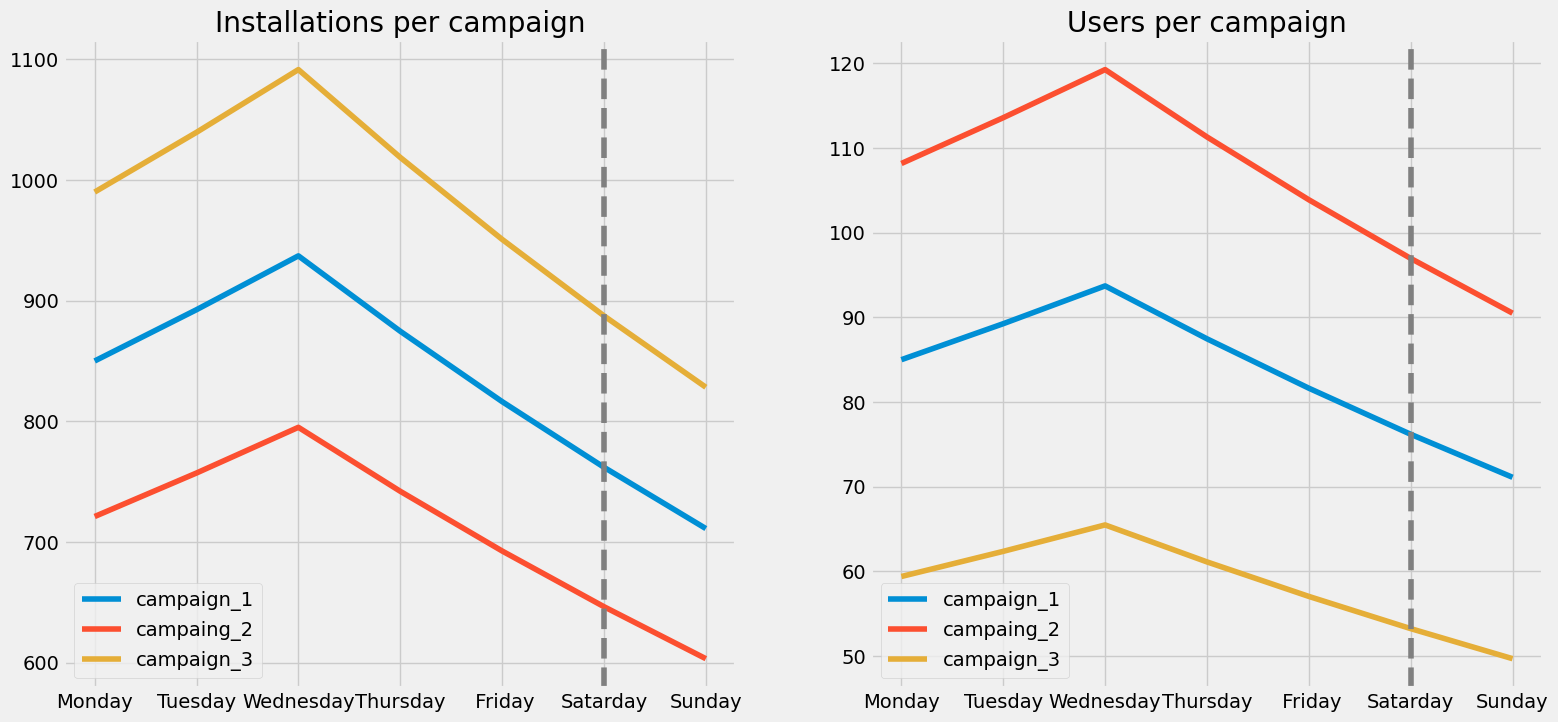

In [18]:
plt.style.use('fivethirtyeight')
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(17,8))

ax1.plot(cumulative_data_compare.index, cumulative_data_compare.instalations)
ax1.legend(cumulative_data_compare.columns.levels[1])
ax1.axvline(x='Satarday', color='gray', linestyle='--', label='End of the budget')
ax1.set_title('Installations per campaign')

ax2.plot(cumulative_data_compare.index, cumulative_data_compare.users)
ax2.legend(cumulative_data_compare.columns.levels[1])
ax2.axvline(x='Satarday', color='gray', linestyle='--', label='End of the budget')
ax2.set_title('Users per campaign')
plt.show()

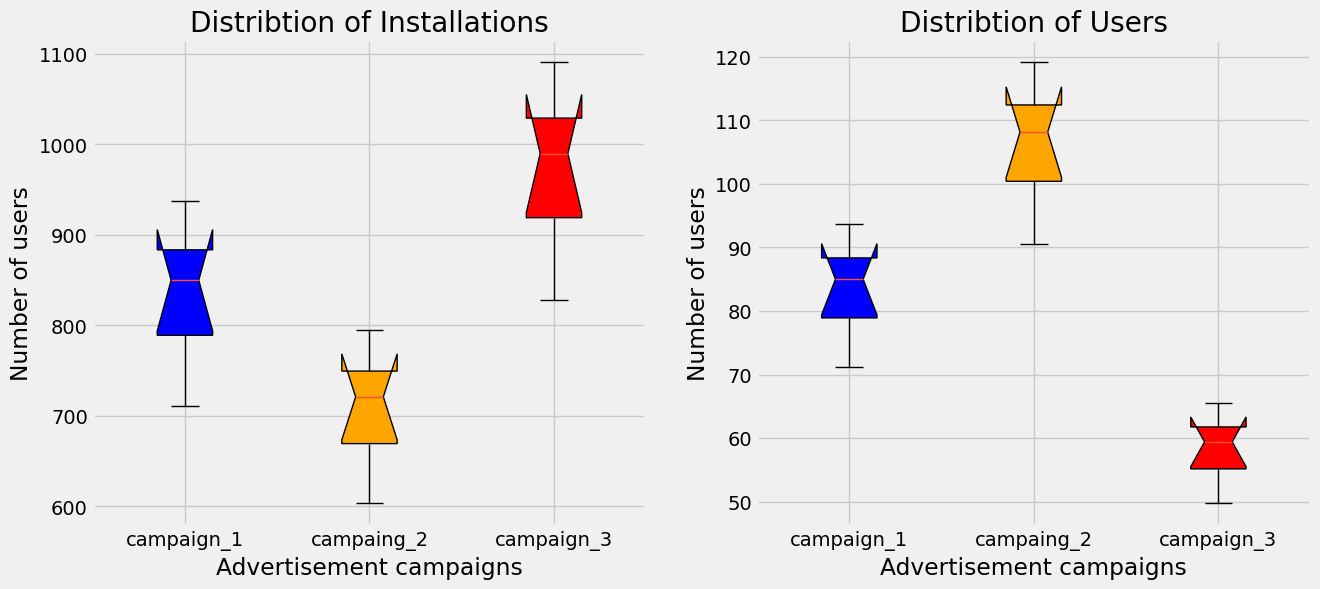

In [19]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(14,6))
labels = list(cumulative_data_compare.columns.levels[1])

bplot1 = ax1.boxplot(cumulative_data_compare.instalations, notch=True, vert=True, patch_artist=True, labels=labels)
bplot2 = ax2.boxplot(cumulative_data_compare.users, notch=True, vert=True, patch_artist=True, labels=labels)
ax1.set_title("Distribtion of Installations")
ax2.set_title("Distribtion of Users")
plt.setp(bplot1['whiskers'], color='black')
plt.setp(bplot2['whiskers'], color='black')

colors = ['blue', 'orange', 'red']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for ax in [ax1, ax2]:
    ax.set_ylabel('Number of users')
    ax.set_xlabel('Advertisement campaigns')


plt.show()